# Predicting airticket fare

In [1]:
import warnings
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import packages
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path:
    sys.path.append('..')

## Data Preparation

### Load and Explore data

In [3]:
from src.data.generate_data import unzip_all_files
unzip_all_files(path='../data/raw/itineraries_csv')

Finished unzipping files for: ../data/raw/itineraries_csv
Finished unzipping files for: ../data/raw/itineraries_csv/OAK
Finished unzipping files for: ../data/raw/itineraries_csv/DEN
Finished unzipping files for: ../data/raw/itineraries_csv/LGA
Finished unzipping files for: ../data/raw/itineraries_csv/LAX
Finished unzipping files for: ../data/raw/itineraries_csv/ATL
Finished unzipping files for: ../data/raw/itineraries_csv/CLT
Finished unzipping files for: ../data/raw/itineraries_csv/PHL
Finished unzipping files for: ../data/raw/itineraries_csv/DTW
Finished unzipping files for: ../data/raw/itineraries_csv/IAD
Finished unzipping files for: ../data/raw/itineraries_csv/JFK
Finished unzipping files for: ../data/raw/itineraries_csv/DFW
Finished unzipping files for: ../data/raw/itineraries_csv/BOS
Finished unzipping files for: ../data/raw/itineraries_csv/EWR
Finished unzipping files for: ../data/raw/itineraries_csv/SFO
Finished unzipping files for: ../data/raw/itineraries_csv/ORD
Finished unz

In [4]:
from src.data.generate_data import load_data_into_dataframe
airtravel_data = load_data_into_dataframe(path='../data/raw/itineraries_csv')

Finished loading files for: ../data/raw/itineraries_csv
Finished loading files for: ../data/raw/itineraries_csv/OAK
Finished loading files for: ../data/raw/itineraries_csv/DEN
Finished loading files for: ../data/raw/itineraries_csv/LGA
Finished loading files for: ../data/raw/itineraries_csv/LAX
Finished loading files for: ../data/raw/itineraries_csv/ATL
Finished loading files for: ../data/raw/itineraries_csv/CLT
Finished loading files for: ../data/raw/itineraries_csv/PHL
Finished loading files for: ../data/raw/itineraries_csv/DTW
Finished loading files for: ../data/raw/itineraries_csv/IAD
Finished loading files for: ../data/raw/itineraries_csv/JFK
Finished loading files for: ../data/raw/itineraries_csv/DFW
Finished loading files for: ../data/raw/itineraries_csv/BOS
Finished loading files for: ../data/raw/itineraries_csv/EWR
Finished loading files for: ../data/raw/itineraries_csv/SFO
Finished loading files for: ../data/raw/itineraries_csv/ORD
Finished loading files for: ../data/raw/itin

In [5]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

airtravel_data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ac4c9f2477a8bbad61ef1f125074a8c8,2022-05-11,2022-05-13,OAK,ATL,PT6H38M,False,False,False,317.60,2281.0,1652467320||1652475600,2022-05-13T11:42:00.000-07:00||2022-05-13T14:0...,1652472000||1652491200,2022-05-13T13:00:00.000-07:00||2022-05-13T21:2...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,4680||15600,338||1943,coach||coach
1,8d2669bd137dbf9bd028b9efad164b1a,2022-05-11,2022-05-13,OAK,ATL,PT6H17M,False,False,False,379.58,NaN,1652500560||1652509200,2022-05-13T20:56:00.000-07:00||2022-05-13T23:2...,1652506140||1652523180,2022-05-13T22:29:00.000-07:00||2022-05-14T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,coach||coach
2,9dddcfcc0d457d02153b9e084f0f10e3,2022-05-11,2022-05-13,OAK,ATL,PT6H15M,False,False,False,463.58,NaN,1652457360||1652464260,2022-05-13T08:56:00.000-07:00||2022-05-13T10:5...,1652462280||1652479860,2022-05-13T10:18:00.000-07:00||2022-05-13T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,coach||coach
3,bfb49b7de334caa506b1e889e620036e,2022-05-11,2022-05-13,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1652447100||1652464260,2022-05-13T06:05:00.000-07:00||2022-05-13T10:5...,1652452020||1652479860,2022-05-13T07:27:00.000-07:00||2022-05-13T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,coach||coach
4,4209e0b6a2eab5cd0d2a72bd1d34261a,2022-05-11,2022-05-13,OAK,ATL,PT14H13M,False,False,False,463.58,NaN,1652472000||1652509200,2022-05-13T13:00:00.000-07:00||2022-05-13T23:2...,1652477460||1652523180,2022-05-13T14:31:00.000-07:00||2022-05-14T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5460||13980,None||None,coach||coach


### Data Preparation for modelling

In [6]:
# Subset dataframe to include only the relevant features
from src.features.build_features import subset_dataframe_and_retrieve_departure_time_cabin_type
features_target_list = ['flightDate', 
                        'startingAirport',
                        'searchDate',
                        'destinationAirport', 
                        'segmentsDepartureTimeRaw', 
                        'segmentsCabinCode', 
                        'totalFare']
subset_airtravel = subset_dataframe_and_retrieve_departure_time_cabin_type(df=airtravel_data, features_target_list=features_target_list)
subset_airtravel.head()

,flightDate,startingAirport,searchDate,destinationAirport,totalFare,departureTimeRaw,cabinType
10684331,2022-04-17,EWR,2022-04-16,CLT,368.60,2022-04-17T11:40:00.000-04:00,coach
3095133,2022-04-17,LAX,2022-04-16,PHL,379.59,2022-04-17T16:21:00.000-07:00,coach
3095093,2022-04-17,LAX,2022-04-16,ORD,508.60,2022-04-17T12:42:00.000-07:00,coach
3095092,2022-04-17,LAX,2022-04-16,ORD,508.60,2022-04-17T14:08:00.000-07:00,coach
3095089,2022-04-17,LAX,2022-04-16,ORD,428.60,2022-04-17T10:32:00.000-07:00,coach


In [32]:
subset_airtravel['startingAirport'].unique()

array(['EWR', 'LAX', 'ORD', 'MIA', 'DFW', 'OAK', 'BOS', 'SFO', 'CLT',
       'IAD', 'JFK', 'LGA', 'ATL', 'DEN', 'DTW', 'PHL'], dtype=object)

In [7]:
# Generating time categories
from src.features.build_features import generate_adjusted_date_and_time_categories
airtravel_time_cats = generate_adjusted_date_and_time_categories(df=subset_airtravel)
airtravel_time_cats.head()

,flightDate,startingAirport,searchDate,destinationAirport,totalFare,departureTimeRaw,cabinType,departuretime,time_category,adjusted_date
10684331,2022-04-17,EWR,2022-04-16,CLT,368.60,2022-04-17T11:40:00.000-04:00,coach,2022-04-17 11:40:00,Midday,2022-04-17
3095133,2022-04-17,LAX,2022-04-16,PHL,379.59,2022-04-17T16:21:00.000-07:00,coach,2022-04-17 16:21:00,Afternoon,2022-04-17
3095093,2022-04-17,LAX,2022-04-16,ORD,508.60,2022-04-17T12:42:00.000-07:00,coach,2022-04-17 12:42:00,Midday,2022-04-17
3095092,2022-04-17,LAX,2022-04-16,ORD,508.60,2022-04-17T14:08:00.000-07:00,coach,2022-04-17 14:08:00,Afternoon,2022-04-17
3095089,2022-04-17,LAX,2022-04-16,ORD,428.60,2022-04-17T10:32:00.000-07:00,coach,2022-04-17 10:32:00,Morning,2022-04-17


In [8]:
# Generating date related features
from src.features.build_features import generate_date_related_features
airtravel_time_date_features = generate_date_related_features(df=airtravel_time_cats)
airtravel_time_date_features.head()

,flightDate,startingAirport,searchDate,destinationAirport,totalFare,departureTimeRaw,cabinType,departuretime,time_category,adjusted_date,days_from_flight,day_of_week,day_name
10684331,2022-04-17,EWR,2022-04-16,CLT,368.60,2022-04-17T11:40:00.000-04:00,coach,2022-04-17 11:40:00,Midday,2022-04-17,"1 day, 0:00:00",6,Sunday
3095133,2022-04-17,LAX,2022-04-16,PHL,379.59,2022-04-17T16:21:00.000-07:00,coach,2022-04-17 16:21:00,Afternoon,2022-04-17,"1 day, 0:00:00",6,Sunday
3095093,2022-04-17,LAX,2022-04-16,ORD,508.60,2022-04-17T12:42:00.000-07:00,coach,2022-04-17 12:42:00,Midday,2022-04-17,"1 day, 0:00:00",6,Sunday
3095092,2022-04-17,LAX,2022-04-16,ORD,508.60,2022-04-17T14:08:00.000-07:00,coach,2022-04-17 14:08:00,Afternoon,2022-04-17,"1 day, 0:00:00",6,Sunday
3095089,2022-04-17,LAX,2022-04-16,ORD,428.60,2022-04-17T10:32:00.000-07:00,coach,2022-04-17 10:32:00,Morning,2022-04-17,"1 day, 0:00:00",6,Sunday


In [9]:
airtravel_time_date_features.to_csv('../data/interim/airtravel_df.csv', index=False)

In [10]:
from src.features.build_features import rename_cols_to_appropriate_names
features_approp_names = rename_cols_to_appropriate_names(df=airtravel_time_date_features)

In [11]:
from src.features.build_features import generate_features_target_dataframes
features, target = generate_features_target_dataframes(df=features_approp_names)
print(features.head())
print(target.head())

        origin_airport destination_airport departure_date cabin_type  \
374711             DEN                 CLT     2022-04-16      coach   
1037149            LAX                 JFK     2022-04-16      coach   
357117             DEN                 ATL     2022-04-16      coach   
1046720            LAX                 MIA     2022-04-16      coach   
1502692            SFO                 DEN     2022-04-16      coach   

        time_category days_from_flight  day_name  
374711     Late Night           0 days  Saturday  
1037149    Late Night           0 days  Saturday  
357117     Late Night           0 days  Saturday  
1046720    Late Night           0 days  Saturday  
1502692    Late Night           0 days  Saturday  
         modal_fare
374711       296.61
1037149      366.60
357117       273.99
1046720      333.60
1502692      123.98


In [12]:
# Exploring data
print(features.info())
# Checking null values
print(features.isna().sum())
# Checking features and target sizes
print(features.shape)
print(target.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1580587 entries, 374711 to 480744
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   origin_airport       1580587 non-null  object
 1   destination_airport  1580587 non-null  object
 2   departure_date       1580587 non-null  object
 3   cabin_type           1580587 non-null  object
 4   time_category        1580587 non-null  object
 5   days_from_flight     1580587 non-null  object
 6   day_name             1580587 non-null  object
dtypes: object(7)
memory usage: 96.5+ MB
None
origin_airport         0
destination_airport    0
departure_date         0
cabin_type             0
time_category          0
days_from_flight       0
day_name               0
dtype: int64
(1580587, 7)
(1580587, 1)


In [13]:
from src.features.build_features import split_dataset
x_train, y_train, x_test, y_test = split_dataset(features=features,
                                                 target=target,
                                                 split_date='2022-06-17')

(1266959, 7)
(1266959, 1)
(313628, 7)
(313628, 1)


### Build preprocessing pipeline

In [14]:
# Checking unique values of categorical columns
print(features['origin_airport'].unique())
print(features['destination_airport'].unique())
print(features['departure_date'].unique())
print(features['cabin_type'].unique())
print(features['time_category'].unique())
print(features['days_from_flight'].unique())
print(features['day_name'].unique())

['DEN' 'LAX' 'SFO' 'BOS' 'ORD' 'IAD' 'DTW' 'ATL' 'JFK' 'DFW' 'CLT' 'OAK'
 'PHL' 'EWR' 'LGA' 'MIA']
['CLT' 'JFK' 'ATL' 'MIA' 'DEN' 'DTW' 'LAX' 'BOS' 'EWR' 'LGA' 'IAD' 'DFW'
 'PHL' 'SFO' 'OAK' 'ORD']
<DatetimeArray>
['2022-04-16 00:00:00', '2022-04-17 00:00:00', '2022-04-18 00:00:00',
 '2022-04-19 00:00:00', '2022-04-20 00:00:00', '2022-04-21 00:00:00',
 '2022-04-22 00:00:00', '2022-04-23 00:00:00', '2022-04-24 00:00:00',
 '2022-04-25 00:00:00', '2022-04-26 00:00:00', '2022-04-27 00:00:00',
 '2022-04-28 00:00:00', '2022-04-29 00:00:00', '2022-04-30 00:00:00',
 '2022-05-01 00:00:00', '2022-05-02 00:00:00', '2022-05-03 00:00:00',
 '2022-05-04 00:00:00', '2022-05-05 00:00:00', '2022-05-06 00:00:00',
 '2022-05-07 00:00:00', '2022-05-08 00:00:00', '2022-05-09 00:00:00',
 '2022-05-10 00:00:00', '2022-05-11 00:00:00', '2022-05-12 00:00:00',
 '2022-05-13 00:00:00', '2022-05-14 00:00:00', '2022-05-15 00:00:00',
 '2022-05-16 00:00:00', '2022-05-17 00:00:00', '2022-05-18 00:00:00',
 '2022-05-19 00:

In [15]:
# Creating lists of column names for high and low cardinal categorical columns
high_cardinal_cat = ['departure_date', 'days_from_flight']
low_cardinal_cat = ['origin_airport', 'destination_airport', 'cabin_type', 
                    'time_category', 'day_name']
# Creating a list of numeric columns
num_cols = []

In [16]:
from src.features.build_features import column_transformer_preprocessor
preprocessor = column_transformer_preprocessor(low_cardinal_cat=low_cardinal_cat,
                                               high_cardinal_cat=high_cardinal_cat)

In [17]:
from src.models.train_model import build_xgb_modelling_pipeline
params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 7,
    'min_child_weight': 3,
    'gamma': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}
xgb_pipe = build_xgb_modelling_pipeline(preprocessor=preprocessor, param_grid=params)

## XGBoost Modelling

In [18]:
from src.models.train_model import train_xgb_model
xgb_pipe = train_xgb_model(xgb_pipe=xgb_pipe, x_train=x_train, y_train=y_train)
xgb_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('low_cardinal_cats',
                                                  Pipeline(steps=[('constant_imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['origin_airport',
                                                   'destination_airport',
                                                   'cabin_type',
                                                   'time_category',
                                                   'day_name...
                              feature_types=None, gamma=3, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

In [19]:
from joblib import dump
dump(xgb_pipe,  '../models/xgb_pipe.joblib')

['../models/xgb_pipe.joblib']

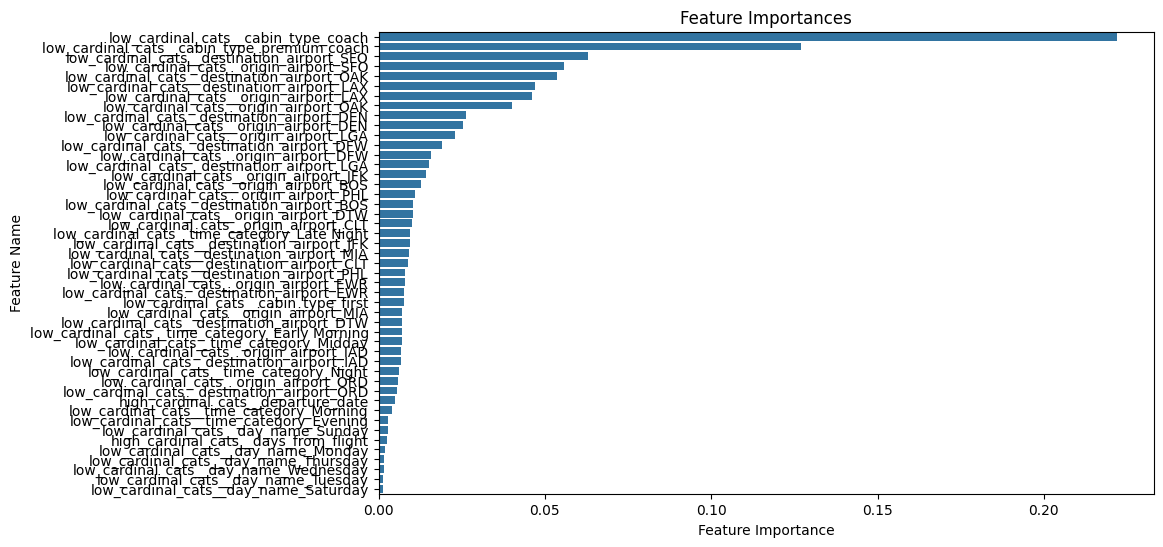

In [20]:
from src.models.train_model import plot_feature_importance_xgb_model
plot_feature_importance_xgb_model(xgb_pipe=xgb_pipe, preprocessor=preprocessor)

## Prediction

In [21]:
# Prediction on train data
train_pred = xgb_pipe.predict(x_train)
# Prediction on test data
test_pred = xgb_pipe.predict(x_test)

In [22]:
# Root mean squared error for train, val and test sets
from src.models.predict_model import print_rmse_scores
print_rmse_scores(y_train=y_train,
                  train_pred=train_pred,
                  y_test=y_test, 
                  test_pred=test_pred)

Training RMSE: 92.45002829768265
Test RMSE: 101.08183421286935


In [23]:
# R2 score for train, val and test sets
from src.models.predict_model import print_r2_scores
print_r2_scores(y_train=y_train,
                train_pred=train_pred,
                y_test=y_test, 
                test_pred=test_pred)

Training R2: 0.7710500819987383
Test R2: 0.6192889144556174


In [24]:
# MAE score for train, val and test sets
from src.models.predict_model import print_mae_scores
print_mae_scores(y_train=y_train,
                train_pred=train_pred,
                y_test=y_test, 
                test_pred=test_pred)

Training MAE: 60.60222883482796
Test MAE: 70.88983480683127
